In [2]:
import json
import random
from collections import Counter
import re

import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix
)
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from transformers import BertTokenizer, BertModel
import torch
import tqdm as tqdm
import pandas as pd
import numpy as np
import spacy
import pickle
import re
from xgboost import XGBClassifier
import nlpaug.augmenter.word as naw
from nltk.corpus import stopwords
import nltk
from itertools import zip_longest
import matplotlib.pyplot as plt  
from sklearn import metrics

## import liz's pipeline

In [3]:
from skills_taxonomy_v2.pipeline.sentence_classifier.create_training_data import *
from skills_taxonomy_v2.pipeline.sentence_classifier.predict_sentence_class import *
from skills_taxonomy_v2.pipeline.sentence_classifier.sentence_classifier import *

## import data

In [4]:
#both karlis and label-studio

with open('/Users/india.kerlenesta/Projects/skills-taxonomy-v2/inputs/new_training_data/training_data.pickle', 'rb') as fp:
    training_data = pickle.load(fp)

len(training_data)

9237

In [6]:
#just label-studio

with open('/inputs/new_training_data/label_studio_training_data.pickle', 'rb') as fp:
    label_training_data = pickle.load(fp)

len(label_training_data)

8212

## preprocess sentence data

In [5]:
# remove numbers, symbols, lowercase, strip trailing white space

def preprocess_training_data(training):
    return [(re.sub(r'\d+[^\w]', ' ', string[0]).lower().strip(), string[1]) for string in training]

## Experiment No. 1 - test liz's pipeline

In [8]:
#print results 

sent_class = SentenceClassifier(
    split_random_seed=1,
    test_size=0.1,
    log_reg_max_iter=1000,
    bert_model_name='paraphrase-MiniLM-L6-v2',
    multi_process=True,
)

X_train, X_test, y_train, y_test = sent_class.split_data(
    training_data, verbose=True
)

X_train_vec = sent_class.fit_transform(X_train)
sent_class.fit(X_train_vec, y_train)

# Training evaluation
y_train_pred = sent_class.predict(X_train_vec)
class_rep_train = sent_class.evaluate(y_train, y_train_pred, verbose=True)

# Test evaluation
y_test_pred = sent_class.predict_transform(X_test)
class_rep_test = sent_class.evaluate(y_test, y_test_pred, verbose=True)

Size of training data: 8313
Size of test data: 924
Counter of training data classes: Counter({0: 6573, 1: 1740})
Counter of test data classes: Counter({0: 731, 1: 193})
2021-08-05 15:21:45,531 - sentence_transformers.SentenceTransformer - INFO - Load pretrained SentenceTransformer: paraphrase-MiniLM-L6-v2
2021-08-05 15:21:45,532 - sentence_transformers.SentenceTransformer - INFO - Did not find folder paraphrase-MiniLM-L6-v2
2021-08-05 15:21:45,533 - sentence_transformers.SentenceTransformer - INFO - Search model on server: http://sbert.net/models/paraphrase-MiniLM-L6-v2.zip
2021-08-05 15:21:45,534 - sentence_transformers.SentenceTransformer - INFO - Load SentenceTransformer from folder: /Users/india.kerlenesta/.cache/torch/sentence_transformers/sbert.net_models_paraphrase-MiniLM-L6-v2
2021-08-05 15:21:45,831 - sentence_transformers.SentenceTransformer - INFO - Use pytorch device: cpu
Getting embeddings for 8313 texts ...
.. with multiprocessing
2021-08-05 15:21:45,831 - sentence_transf

## Experiment No. 2 - test liz's pipeline on label studio data alone 

In [9]:
#print results 

sent_class = SentenceClassifier(
    split_random_seed=1,
    test_size=0.1,
    log_reg_max_iter=1000,
    bert_model_name='paraphrase-MiniLM-L6-v2',
    multi_process=True,
)

X_train, X_test, y_train, y_test = sent_class.split_data(
    label_training_data, verbose=True
)

X_train_vec = sent_class.fit_transform(X_train)
sent_class.fit(X_train_vec, y_train)

# Training evaluation
y_train_pred = sent_class.predict(X_train_vec)
class_rep_train = sent_class.evaluate(y_train, y_train_pred, verbose=True)

# Test evaluation
y_test_pred = sent_class.predict_transform(X_test)
class_rep_test = sent_class.evaluate(y_test, y_test_pred, verbose=True)

Size of training data: 7390
Size of test data: 822
Counter of training data classes: Counter({0: 6089, 1: 1301})
Counter of test data classes: Counter({0: 677, 1: 145})
2021-08-05 15:24:03,697 - sentence_transformers.SentenceTransformer - INFO - Load pretrained SentenceTransformer: paraphrase-MiniLM-L6-v2
2021-08-05 15:24:03,697 - sentence_transformers.SentenceTransformer - INFO - Did not find folder paraphrase-MiniLM-L6-v2
2021-08-05 15:24:03,698 - sentence_transformers.SentenceTransformer - INFO - Search model on server: http://sbert.net/models/paraphrase-MiniLM-L6-v2.zip
2021-08-05 15:24:03,699 - sentence_transformers.SentenceTransformer - INFO - Load SentenceTransformer from folder: /Users/india.kerlenesta/.cache/torch/sentence_transformers/sbert.net_models_paraphrase-MiniLM-L6-v2
2021-08-05 15:24:03,994 - sentence_transformers.SentenceTransformer - INFO - Use pytorch device: cpu
Getting embeddings for 7390 texts ...
.. with multiprocessing
2021-08-05 15:24:03,994 - sentence_transf

## Experiment No. 3 - preprocess text + all training data

In [11]:
sent_class = SentenceClassifier(
    split_random_seed=1,
    test_size=0.1,
    log_reg_max_iter=1000,
    bert_model_name='paraphrase-MiniLM-L6-v2',
    multi_process=True,
)

X_train, X_test, y_train, y_test = sent_class.split_data(
    clean_training, verbose=True
)

X_train_vec = sent_class.fit_transform(X_train)
sent_class.fit(X_train_vec, y_train)

# Training evaluation
y_train_pred = sent_class.predict(X_train_vec)
class_rep_train = sent_class.evaluate(y_train, y_train_pred, verbose=True)

# Test evaluation
y_test_pred = sent_class.predict_transform(X_test)
class_rep_test = sent_class.evaluate(y_test, y_test_pred, verbose=True)

Size of training data: 8313
Size of test data: 924
Counter of training data classes: Counter({0: 6573, 1: 1740})
Counter of test data classes: Counter({0: 731, 1: 193})
2021-08-06 09:50:17,069 - sentence_transformers.SentenceTransformer - INFO - Load pretrained SentenceTransformer: paraphrase-MiniLM-L6-v2
2021-08-06 09:50:17,069 - sentence_transformers.SentenceTransformer - INFO - Did not find folder paraphrase-MiniLM-L6-v2
2021-08-06 09:50:17,070 - sentence_transformers.SentenceTransformer - INFO - Search model on server: http://sbert.net/models/paraphrase-MiniLM-L6-v2.zip
2021-08-06 09:50:17,071 - sentence_transformers.SentenceTransformer - INFO - Load SentenceTransformer from folder: /Users/india.kerlenesta/.cache/torch/sentence_transformers/sbert.net_models_paraphrase-MiniLM-L6-v2
2021-08-06 09:50:17,395 - sentence_transformers.SentenceTransformer - INFO - Use pytorch device: cpu
Getting embeddings for 8313 texts ...
.. with multiprocessing
2021-08-06 09:50:17,396 - sentence_transf

## Experiment No. 4 - use XGBOOST 

In [11]:
#vectorise test data 
X_test_vec = sent_class.fit_transform(X_test)

# run on xgboost

xgb = XGBClassifier(max_depth= 7, min_child_weight= 1)
xgb.fit(X_train_vec, y_train)
predict = xgb.predict(X_test_vec)
print(classification_report(y_test, predict))

2021-08-05 15:28:17,232 - sentence_transformers.SentenceTransformer - INFO - Load pretrained SentenceTransformer: paraphrase-MiniLM-L6-v2
2021-08-05 15:28:17,234 - sentence_transformers.SentenceTransformer - INFO - Did not find folder paraphrase-MiniLM-L6-v2
2021-08-05 15:28:17,235 - sentence_transformers.SentenceTransformer - INFO - Search model on server: http://sbert.net/models/paraphrase-MiniLM-L6-v2.zip
2021-08-05 15:28:17,237 - sentence_transformers.SentenceTransformer - INFO - Load SentenceTransformer from folder: /Users/india.kerlenesta/.cache/torch/sentence_transformers/sbert.net_models_paraphrase-MiniLM-L6-v2
2021-08-05 15:28:17,557 - sentence_transformers.SentenceTransformer - INFO - Use pytorch device: cpu
Getting embeddings for 924 texts ...
.. with multiprocessing
2021-08-05 15:28:17,557 - sentence_transformers.SentenceTransformer - INFO - CUDA is not available. Start 4 CPU worker
2021-08-05 15:28:17,558 - sentence_transformers.SentenceTransformer - INFO - Start multi-pro

/Users/india.kerlenesta/opt/anaconda3/envs/skills-taxonomy-v2/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


              precision    recall  f1-score   support

           0       0.88      0.95      0.91       731
           1       0.73      0.49      0.58       193

    accuracy                           0.85       924
   macro avg       0.80      0.72      0.75       924
weighted avg       0.84      0.85      0.84       924



## Experiment No. 5 - Balance training data - undersample 0 class

In [22]:
# get all skill labels in training set from clean_training
skills = [(train, label) for train, label in zip(X_train, y_train) if label == 1]

# randomly sample non skill sentences 
no_skill_undersample = random.sample([(train, label) for train, label in zip(X_train, y_train) if label == 0], len(skills))

# create new balanced training set 
balanced_training = no_skill_undersample + skills

X_train_undersample = [x[0] for x in balanced_training]
y_train_undersample = [x[1] for x in balanced_training]

print(f'balanced training sentences is now {Counter(y_train_undersample)}')
print(f'test set is {Counter(y_test)}')

balanced training sentences is now Counter({0: 1740, 1: 1740})
test set is Counter({0: 731, 1: 193})


In [23]:
# vectorise training data
X_train_vec = sent_class.fit_transform(X_train_undersample)

2021-08-05 15:32:27,902 - sentence_transformers.SentenceTransformer - INFO - Load pretrained SentenceTransformer: paraphrase-MiniLM-L6-v2
2021-08-05 15:32:27,904 - sentence_transformers.SentenceTransformer - INFO - Did not find folder paraphrase-MiniLM-L6-v2
2021-08-05 15:32:27,905 - sentence_transformers.SentenceTransformer - INFO - Search model on server: http://sbert.net/models/paraphrase-MiniLM-L6-v2.zip
2021-08-05 15:32:27,906 - sentence_transformers.SentenceTransformer - INFO - Load SentenceTransformer from folder: /Users/india.kerlenesta/.cache/torch/sentence_transformers/sbert.net_models_paraphrase-MiniLM-L6-v2
2021-08-05 15:32:28,236 - sentence_transformers.SentenceTransformer - INFO - Use pytorch device: cpu
Getting embeddings for 3480 texts ...
.. with multiprocessing
2021-08-05 15:32:28,236 - sentence_transformers.SentenceTransformer - INFO - CUDA is not available. Start 4 CPU worker
2021-08-05 15:32:28,236 - sentence_transformers.SentenceTransformer - INFO - Start multi-pr

In [25]:
# run balanced data on xgboost

xgb = XGBClassifier(max_depth= 7, min_child_weight= 1)
xgb.fit(X_train_vec, y_train_undersample)
predict = xgb.predict(X_test_vec)
print(classification_report(y_test, predict))

[15:33:31] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.95      0.79      0.86       731
           1       0.52      0.85      0.64       193

    accuracy                           0.80       924
   macro avg       0.73      0.82      0.75       924
weighted avg       0.86      0.80      0.82       924



## Experiment No. 6 - Balance training data - use nlpaug word synonyms to oversample 1 class

In [32]:
#generate augmented skills sentences with wordnet + balance classes
# oversample 1 class

def oversample_skills_wordnet(skills_data):
    aug = naw.SynonymAug(aug_src='wordnet')
    augmented_skills = [(aug.augment(train[0]), train[1]) for train in skills_data]
    return skills_data + augmented_skills

In [33]:
#make training data
skills_augment = oversample_skills_wordnet(skills)
balanced_augment_training = skills_augment + [(train, label) for train, label in zip(X_train, y_train) if label == 0]

X_train_oversample_syns = [x[0] for x in balanced_augment_training]
y_train_oversample_syns = [x[1] for x in balanced_augment_training]

print(f'balanced training sentences is now {Counter(y_train_oversample_syns)}')
print(len(y_train_oversample_syns))
print(f'test set is {Counter(y_test)}')
print(len(y_test))

balanced training sentences is now Counter({0: 6573, 1: 3480})
10053
test set is Counter({0: 731, 1: 193})
924


In [30]:
# vectorise new training
X_train_vec = sent_class.fit_transform(X_train_oversample_syns)

2021-08-05 15:34:58,841 - sentence_transformers.SentenceTransformer - INFO - Load pretrained SentenceTransformer: paraphrase-MiniLM-L6-v2
2021-08-05 15:34:58,843 - sentence_transformers.SentenceTransformer - INFO - Did not find folder paraphrase-MiniLM-L6-v2
2021-08-05 15:34:58,845 - sentence_transformers.SentenceTransformer - INFO - Search model on server: http://sbert.net/models/paraphrase-MiniLM-L6-v2.zip
2021-08-05 15:34:58,848 - sentence_transformers.SentenceTransformer - INFO - Load SentenceTransformer from folder: /Users/india.kerlenesta/.cache/torch/sentence_transformers/sbert.net_models_paraphrase-MiniLM-L6-v2
2021-08-05 15:34:59,161 - sentence_transformers.SentenceTransformer - INFO - Use pytorch device: cpu
Getting embeddings for 10053 texts ...
.. with multiprocessing
2021-08-05 15:34:59,161 - sentence_transformers.SentenceTransformer - INFO - CUDA is not available. Start 4 CPU worker
2021-08-05 15:34:59,162 - sentence_transformers.SentenceTransformer - INFO - Start multi-p

In [31]:
# run balanced data on xgboost

xgb = XGBClassifier(max_depth= 7, min_child_weight= 1)
xgb.fit(X_train_vec, y_train_oversample_syns)
predict = xgb.predict(X_test_vec)
print(classification_report(y_test, predict))

[15:36:32] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       731
           1       0.69      0.68      0.68       193

    accuracy                           0.87       924
   macro avg       0.80      0.80      0.80       924
weighted avg       0.87      0.87      0.87       924



## Experiment No. 7 - Balance training data - use contextual word embeddings to oversample 1 class

In [45]:
#generate augmented skills sentences with wordnet + balance classes

def oversample_skills_embeds(skills_data):
    stops = stopwords.words('english')
    aug = naw.ContextualWordEmbsAug(aug_min = 1, stopwords = stops)
    augmented_embed_skill_sents = []
    for index, train in enumerate(skills):
        augment_word_embeds = aug.augment(train[0])
        print(f'augmented {index} sentence!')
        augmented_embed_skill_sents.append((augment_word_embeds, train[1]))
    return skills_data + augmented_embed_skill_sents


In [46]:
#make training data - word embeds 

skills_augment_embed = oversample_skills_embeds(skills)
balanced_augment_embed = skills_augment_embed + [(train, label) for train, label in zip(X_train, y_train) if label == 0]

X_train_oversample_embeds = [x[0] for x in balanced_augment_embed]
y_train_oversample_embeds = [x[1] for x in balanced_augment_embed]

print(f'balanced training sentences is now {Counter(y_train_oversample_embeds)}')
print(len(y_train_oversample_embeds))

print(f'test set is {Counter(y_test)}')
print(len(y_test))

augmented 0 sentence!
augmented 1 sentence!
augmented 2 sentence!
augmented 3 sentence!
augmented 4 sentence!
augmented 5 sentence!
augmented 6 sentence!
augmented 7 sentence!
augmented 8 sentence!
augmented 9 sentence!
augmented 10 sentence!
augmented 11 sentence!
augmented 12 sentence!
augmented 13 sentence!
augmented 14 sentence!
augmented 15 sentence!
augmented 16 sentence!
augmented 17 sentence!
augmented 18 sentence!
augmented 19 sentence!
augmented 20 sentence!
augmented 21 sentence!
augmented 22 sentence!
augmented 23 sentence!
augmented 24 sentence!
augmented 25 sentence!
augmented 26 sentence!
augmented 27 sentence!
augmented 28 sentence!
augmented 29 sentence!
augmented 30 sentence!
augmented 31 sentence!
augmented 32 sentence!
augmented 33 sentence!
augmented 34 sentence!
augmented 35 sentence!
augmented 36 sentence!
augmented 37 sentence!
augmented 38 sentence!
augmented 39 sentence!
augmented 40 sentence!
augmented 41 sentence!
augmented 42 sentence!
augmented 43 sentence

augmented 346 sentence!
augmented 347 sentence!
augmented 348 sentence!
augmented 349 sentence!
augmented 350 sentence!
augmented 351 sentence!
augmented 352 sentence!
augmented 353 sentence!
augmented 354 sentence!
augmented 355 sentence!
augmented 356 sentence!
augmented 357 sentence!
augmented 358 sentence!
augmented 359 sentence!
augmented 360 sentence!
augmented 361 sentence!
augmented 362 sentence!
augmented 363 sentence!
augmented 364 sentence!
augmented 365 sentence!
augmented 366 sentence!
augmented 367 sentence!
augmented 368 sentence!
augmented 369 sentence!
augmented 370 sentence!
augmented 371 sentence!
augmented 372 sentence!
augmented 373 sentence!
augmented 374 sentence!
augmented 375 sentence!
augmented 376 sentence!
augmented 377 sentence!
augmented 378 sentence!
augmented 379 sentence!
augmented 380 sentence!
augmented 381 sentence!
augmented 382 sentence!
augmented 383 sentence!
augmented 384 sentence!
augmented 385 sentence!
augmented 386 sentence!
augmented 387 se

augmented 688 sentence!
augmented 689 sentence!
augmented 690 sentence!
augmented 691 sentence!
augmented 692 sentence!
augmented 693 sentence!
augmented 694 sentence!
augmented 695 sentence!
augmented 696 sentence!
augmented 697 sentence!
augmented 698 sentence!
augmented 699 sentence!
augmented 700 sentence!
augmented 701 sentence!
augmented 702 sentence!
augmented 703 sentence!
augmented 704 sentence!
augmented 705 sentence!
augmented 706 sentence!
augmented 707 sentence!
augmented 708 sentence!
augmented 709 sentence!
augmented 710 sentence!
augmented 711 sentence!
augmented 712 sentence!
augmented 713 sentence!
augmented 714 sentence!
augmented 715 sentence!
augmented 716 sentence!
augmented 717 sentence!
augmented 718 sentence!
augmented 719 sentence!
augmented 720 sentence!
augmented 721 sentence!
augmented 722 sentence!
augmented 723 sentence!
augmented 724 sentence!
augmented 725 sentence!
augmented 726 sentence!
augmented 727 sentence!
augmented 728 sentence!
augmented 729 se

augmented 1029 sentence!
augmented 1030 sentence!
augmented 1031 sentence!
augmented 1032 sentence!
augmented 1033 sentence!
augmented 1034 sentence!
augmented 1035 sentence!
augmented 1036 sentence!
augmented 1037 sentence!
augmented 1038 sentence!
augmented 1039 sentence!
augmented 1040 sentence!
augmented 1041 sentence!
augmented 1042 sentence!
augmented 1043 sentence!
augmented 1044 sentence!
augmented 1045 sentence!
augmented 1046 sentence!
augmented 1047 sentence!
augmented 1048 sentence!
augmented 1049 sentence!
augmented 1050 sentence!
augmented 1051 sentence!
augmented 1052 sentence!
augmented 1053 sentence!
augmented 1054 sentence!
augmented 1055 sentence!
augmented 1056 sentence!
augmented 1057 sentence!
augmented 1058 sentence!
augmented 1059 sentence!
augmented 1060 sentence!
augmented 1061 sentence!
augmented 1062 sentence!
augmented 1063 sentence!
augmented 1064 sentence!
augmented 1065 sentence!
augmented 1066 sentence!
augmented 1067 sentence!
augmented 1068 sentence!


augmented 1357 sentence!
augmented 1358 sentence!
augmented 1359 sentence!
augmented 1360 sentence!
augmented 1361 sentence!
augmented 1362 sentence!
augmented 1363 sentence!
augmented 1364 sentence!
augmented 1365 sentence!
augmented 1366 sentence!
augmented 1367 sentence!
augmented 1368 sentence!
augmented 1369 sentence!
augmented 1370 sentence!
augmented 1371 sentence!
augmented 1372 sentence!
augmented 1373 sentence!
augmented 1374 sentence!
augmented 1375 sentence!
augmented 1376 sentence!
augmented 1377 sentence!
augmented 1378 sentence!
augmented 1379 sentence!
augmented 1380 sentence!
augmented 1381 sentence!
augmented 1382 sentence!
augmented 1383 sentence!
augmented 1384 sentence!
augmented 1385 sentence!
augmented 1386 sentence!
augmented 1387 sentence!
augmented 1388 sentence!
augmented 1389 sentence!
augmented 1390 sentence!
augmented 1391 sentence!
augmented 1392 sentence!
augmented 1393 sentence!
augmented 1394 sentence!
augmented 1395 sentence!
augmented 1396 sentence!


augmented 1685 sentence!
augmented 1686 sentence!
augmented 1687 sentence!
augmented 1688 sentence!
augmented 1689 sentence!
augmented 1690 sentence!
augmented 1691 sentence!
augmented 1692 sentence!
augmented 1693 sentence!
augmented 1694 sentence!
augmented 1695 sentence!
augmented 1696 sentence!
augmented 1697 sentence!
augmented 1698 sentence!
augmented 1699 sentence!
augmented 1700 sentence!
augmented 1701 sentence!
augmented 1702 sentence!
augmented 1703 sentence!
augmented 1704 sentence!
augmented 1705 sentence!
augmented 1706 sentence!
augmented 1707 sentence!
augmented 1708 sentence!
augmented 1709 sentence!
augmented 1710 sentence!
augmented 1711 sentence!
augmented 1712 sentence!
augmented 1713 sentence!
augmented 1714 sentence!
augmented 1715 sentence!
augmented 1716 sentence!
augmented 1717 sentence!
augmented 1718 sentence!
augmented 1719 sentence!
augmented 1720 sentence!
augmented 1721 sentence!
augmented 1722 sentence!
augmented 1723 sentence!
augmented 1724 sentence!


In [54]:
# vectorise new training
X_train_vec = sent_class.fit_transform(X_train_oversample_embeds)

2021-08-05 16:27:00,961 - sentence_transformers.SentenceTransformer - INFO - Load pretrained SentenceTransformer: paraphrase-MiniLM-L6-v2
2021-08-05 16:27:00,962 - sentence_transformers.SentenceTransformer - INFO - Did not find folder paraphrase-MiniLM-L6-v2
2021-08-05 16:27:00,963 - sentence_transformers.SentenceTransformer - INFO - Search model on server: http://sbert.net/models/paraphrase-MiniLM-L6-v2.zip
2021-08-05 16:27:00,964 - sentence_transformers.SentenceTransformer - INFO - Load SentenceTransformer from folder: /Users/india.kerlenesta/.cache/torch/sentence_transformers/sbert.net_models_paraphrase-MiniLM-L6-v2
2021-08-05 16:27:01,274 - sentence_transformers.SentenceTransformer - INFO - Use pytorch device: cpu
Getting embeddings for 10053 texts ...
.. with multiprocessing
2021-08-05 16:27:01,275 - sentence_transformers.SentenceTransformer - INFO - CUDA is not available. Start 4 CPU worker
2021-08-05 16:27:01,275 - sentence_transformers.SentenceTransformer - INFO - Start multi-p

In [55]:
# run balanced data on xgboost

xgb = XGBClassifier(max_depth= 7, min_child_weight= 1)
xgb.fit(X_train_vec, y_train_oversample_embeds)
predict = xgb.predict(X_test_vec)
print(classification_report(y_test, predict))

[16:28:29] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       731
           1       0.66      0.73      0.69       193

    accuracy                           0.86       924
   macro avg       0.79      0.81      0.80       924
weighted avg       0.87      0.86      0.87       924



## Experiment No. 8 - Balance training data - oversample 1 class (word synonyms) + under sample 0 class

In [56]:
oversample_undersample_training_syns = skills_augment + random.sample([(train, label) for train, label in zip(X_train, y_train) if label == 0], 
                                     len(skills_augment))

X_train_overunder_syns = [x[0] for x in oversample_undersample_training_syns]
y_train_overunder_syns = [x[1] for x in oversample_undersample_training_syns]

print(f'balanced training sentences is now {Counter(y_train_overunder_syns)}')
print(len(y_train_overunder_syns))
print(f'test set is {Counter(y_test)}')
print(len(y_test))

X_train_vec = sent_class.fit_transform(X_train_overunder_syns)

# run balanced data on xgboost

xgb = XGBClassifier(max_depth= 7, min_child_weight= 1)
xgb.fit(X_train_vec, y_train_overunder_syns)
predict = xgb.predict(X_test_vec)
print(classification_report(y_test, predict))

balanced training sentences is now Counter({1: 3480, 0: 3480})
6960
test set is Counter({0: 731, 1: 193})
924
2021-08-05 16:29:41,131 - sentence_transformers.SentenceTransformer - INFO - Load pretrained SentenceTransformer: paraphrase-MiniLM-L6-v2
2021-08-05 16:29:41,132 - sentence_transformers.SentenceTransformer - INFO - Did not find folder paraphrase-MiniLM-L6-v2
2021-08-05 16:29:41,132 - sentence_transformers.SentenceTransformer - INFO - Search model on server: http://sbert.net/models/paraphrase-MiniLM-L6-v2.zip
2021-08-05 16:29:41,134 - sentence_transformers.SentenceTransformer - INFO - Load SentenceTransformer from folder: /Users/india.kerlenesta/.cache/torch/sentence_transformers/sbert.net_models_paraphrase-MiniLM-L6-v2
2021-08-05 16:29:41,453 - sentence_transformers.SentenceTransformer - INFO - Use pytorch device: cpu
Getting embeddings for 6960 texts ...
.. with multiprocessing
2021-08-05 16:29:41,453 - sentence_transformers.SentenceTransformer - INFO - CUDA is not available. 

## Experiment No. 9 - Balance training data - oversample 1 class (word embeds) + under sample 0 class

In [57]:
oversample_undersample_training_embeds = skills_augment_embed + random.sample([(train, label) for train, label in zip(X_train, y_train) if label == 0], 
                                     len(skills_augment_embed))
X_train_overunder_embeds = [x[0] for x in oversample_undersample_training_embeds]
y_train_overunder_embeds = [x[1] for x in oversample_undersample_training_embeds]

print(f'balanced training sentences is now {Counter(y_train_overunder_embeds)}')
print(len(y_train_overunder_embeds))
print(f'test set is {Counter(y_test)}')
print(len(y_test))

X_train_vec = sent_class.fit_transform(X_train_overunder_embeds)

# run balanced data on xgboost
xgb = XGBClassifier(max_depth= 7, min_child_weight= 1)
xgb.fit(X_train_vec, y_train_overunder_embeds)
predict = xgb.predict(X_test_vec)
print(classification_report(y_test, predict))

balanced training sentences is now Counter({1: 3480, 0: 3480})
6960
test set is Counter({0: 731, 1: 193})
924
2021-08-05 16:31:37,486 - sentence_transformers.SentenceTransformer - INFO - Load pretrained SentenceTransformer: paraphrase-MiniLM-L6-v2
2021-08-05 16:31:37,487 - sentence_transformers.SentenceTransformer - INFO - Did not find folder paraphrase-MiniLM-L6-v2
2021-08-05 16:31:37,487 - sentence_transformers.SentenceTransformer - INFO - Search model on server: http://sbert.net/models/paraphrase-MiniLM-L6-v2.zip
2021-08-05 16:31:37,488 - sentence_transformers.SentenceTransformer - INFO - Load SentenceTransformer from folder: /Users/india.kerlenesta/.cache/torch/sentence_transformers/sbert.net_models_paraphrase-MiniLM-L6-v2
2021-08-05 16:31:37,832 - sentence_transformers.SentenceTransformer - INFO - Use pytorch device: cpu
Getting embeddings for 6960 texts ...
.. with multiprocessing
2021-08-05 16:31:37,832 - sentence_transformers.SentenceTransformer - INFO - CUDA is not available. 

## Experiment No. 10 - use one hot encoding of verb positionality w/o balancing

In [13]:
def count_verbs(text_data, max_len = 600):
    verb_pos = []
    for text in text_data:
        pos_tags = nltk.pos_tag(nltk.word_tokenize(text))
        verb_pos.append([tag[1].count('VBG') for tag in pos_tags])
    
    # to array 
    verb_array = np.array(list(zip_longest(*verb_pos, fillvalue=0))).T
    
    return np.array([np.pad(x, (0, max_len - len(x)), 'constant') for x in verb_array])

In [70]:
# stack verb counts 
train_verb_stack = np.hstack((X_train_vec, count_verbs(X_train)))
test_verb_stack = np.hstack((X_test_vec, count_verbs(X_test)))

Traceback (most recent call last):
  File "/Users/india.kerlenesta/opt/anaconda3/envs/skills-taxonomy-v2/lib/python3.8/multiprocessing/queues.py", line 245, in _feed
    send_bytes(obj)
  File "/Users/india.kerlenesta/opt/anaconda3/envs/skills-taxonomy-v2/lib/python3.8/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/Users/india.kerlenesta/opt/anaconda3/envs/skills-taxonomy-v2/lib/python3.8/multiprocessing/connection.py", line 411, in _send_bytes
    self._send(header + buf)
  File "/Users/india.kerlenesta/opt/anaconda3/envs/skills-taxonomy-v2/lib/python3.8/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
Traceback (most recent call last):
  File "/Users/india.kerlenesta/opt/anaconda3/envs/skills-taxonomy-v2/lib/python3.8/multiprocessing/queues.py", line 245, in _feed
    send_bytes(obj)
  File "/Users/india.kerlenesta/opt/anaconda3/envs/skills-taxono

In [71]:
# run xgboost

xgb = XGBClassifier(max_depth= 7, min_child_weight= 1)
xgb.fit(train_verb_stack, y_train)
predict = xgb.predict(test_verb_stack)
print(classification_report(y_test, predict))

/Users/india.kerlenesta/opt/anaconda3/envs/skills-taxonomy-v2/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:38:18] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       731
           1       0.74      0.55      0.63       193

    accuracy                           0.86       924
   macro avg       0.81      0.75      0.77       924
weighted avg       0.86      0.86      0.86       924



## Experiment No. 11 - adjust probability threshold to 0.4

In [72]:
#print false positives

predicted_probabilities = xgb.predict_proba(test_verb_stack)
for sentence, probability, test_label, predicted_label in zip(X_test, predicted_probabilities, y_test, predict):
    if test_label == 0 and predicted_label == 1:
        print(sentence)

perform second level one up reviews on those loans recommended for approval above someones lending authority
driven development with chai junit karma mocha sinon behaviour
working as part of a supportive multidisciplinary team you will be expected to carry out ongoing treatment programmes for a mixed caseload of mainly older people
can you help college students with subjects like construction sports painting and english
my client is dynamic fast paced and in an exciting environment
supporting the financial control environment accounts payable adhoc project work as and when required
report and take necessary action for any incidents of accidents fire theft loss damage or other irregularities to deal with any complaints issues from customers immediately and report directly to your supervisor to be flexible to work additional number in order to cover holiday and sickness within the team
organization skills
as senior bi developer you will be responsible for developing enhancing and keeping

In [73]:
# look into edge case sentences

edge_cases = []
for index, probabilities in enumerate(predicted_probabilities):
    if 0.45 < probabilities[0] < 0.65:
        edge_cases.append((index, probabilities[0], probabilities[1]))

for i in edge_cases:
    print(f'the sent is: {X_test[i[0]]}')
    print(f'the predicted label is: {predict[i[0]]}')
    print(f'the true label is: {y_test[i[0]]}')
    print(f'the probability is: {str(round(i[1], 3))}')

the sent is: is happy to work remotely
the predicted label is: 0
the true label is: 0
the probability is: 0.523
the sent is: working as part of a supportive multidisciplinary team you will be expected to carry out ongoing treatment programmes for a mixed caseload of mainly older people
the predicted label is: 1
the true label is: 0
the probability is: 0.491
the sent is: the successful applicant will be joining a really friendly team within a successful and dyanmic organisation
the predicted label is: 0
the true label is: 0
the probability is: 0.639
the sent is: reviews of expenses purchasing card fuel cards statements if any to ensure compliance with policies
the predicted label is: 0
the true label is: 1
the probability is: 0.51
the sent is: key requirementsstrong experience in digital marketing specifically ppc campaigns strong commercial acumen experience creating and managing ppc campaigns including social media channels and google adsexperience of using web analytics tools
the pre

In [74]:
# adjust threshold

y_pred_adjusted = []
for prob in predicted_probabilities:
    y_pred_adjusted.append(int(np.where(prob[1] > 0.40, 1, 0)))
    
print(classification_report(y_test, y_pred_adjusted))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       731
           1       0.71      0.61      0.66       193

    accuracy                           0.87       924
   macro avg       0.80      0.77      0.79       924
weighted avg       0.86      0.87      0.86       924



## Experiment No. 12 - adjust probability threshold to 0.7

In [80]:
# adjust threshold

y_pred_adjusted = []
for prob in predicted_probabilities:
    y_pred_adjusted.append(int(np.where(prob[1] > 0.60, 1, 0)))
    
print(classification_report(y_test, y_pred_adjusted))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       731
           1       0.77      0.52      0.62       193

    accuracy                           0.87       924
   macro avg       0.82      0.74      0.77       924
weighted avg       0.86      0.87      0.86       924



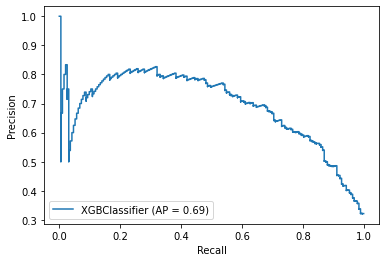

In [81]:
# plot precision_recall

metrics.plot_precision_recall_curve(xgb, test_verb_stack, y_test)

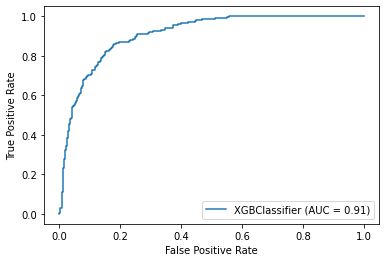

In [82]:
#plot ROC curve

metrics.plot_roc_curve(xgb, test_verb_stack, y_test)

## Stochasticity

In [14]:
# running latest pipeline with different seeds

clean_training_data = preprocess_training_data(training_data)
X = [x[0] for x in clean_training_data]
y = [x[1] for x in clean_training_data]

random_seeds = [4, 22, 235, 42, 55]
different_splits = {}
for seed in random_seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)    
    different_splits[f'seed_{seed}'] = {}
    different_splits[f'seed_{seed}']['X_train'] = X_train
    different_splits[f'seed_{seed}']['X_test'] = X_test
    different_splits[f'seed_{seed}']['y_train'] = y_train
    different_splits[f'seed_{seed}']['y_test'] = y_test

In [15]:
def current_pipeline(X_train, y_train, X_test, y_test):
    #vectorise 
    X_train_vec = sent_class.fit_transform(X_train)
    X_test_vec = sent_class.fit_transform(X_test)
    #stack 
    train_verb_stack = np.hstack((X_train_vec, count_verbs(X_train)))
    test_verb_stack = np.hstack((X_test_vec, count_verbs(X_test)))
    #classify
    xgb = XGBClassifier(max_depth= 7, min_child_weight= 1)
    xgb.fit(train_verb_stack, y_train)
    predict = xgb.predict(test_verb_stack)
    print(classification_report(y_test, predict))
    
    return X_train_vec, X_test_vec, train_verb_stack, test_verb_stack, xgb, predict

In [ ]:
for key, value in different_splits.items():
    print(f'model trained on {key}')
    X_train_vec, X_test_vec, train_verb_stack, test_verb_stack, xgb, predict = current_pipeline(different_splits[key]['X_train'], different_splits[key]['y_train'], 
                     different_splits[key]['X_test'], different_splits[key]['y_test'])
    print('------------')

model trained on seed_4
2021-08-06 09:51:50,229 - sentence_transformers.SentenceTransformer - INFO - Load pretrained SentenceTransformer: paraphrase-MiniLM-L6-v2
2021-08-06 09:51:50,230 - sentence_transformers.SentenceTransformer - INFO - Did not find folder paraphrase-MiniLM-L6-v2
2021-08-06 09:51:50,231 - sentence_transformers.SentenceTransformer - INFO - Search model on server: http://sbert.net/models/paraphrase-MiniLM-L6-v2.zip
2021-08-06 09:51:50,232 - sentence_transformers.SentenceTransformer - INFO - Load SentenceTransformer from folder: /Users/india.kerlenesta/.cache/torch/sentence_transformers/sbert.net_models_paraphrase-MiniLM-L6-v2
2021-08-06 09:51:50,548 - sentence_transformers.SentenceTransformer - INFO - Use pytorch device: cpu
Getting embeddings for 6188 texts ...
.. with multiprocessing
2021-08-06 09:51:50,548 - sentence_transformers.SentenceTransformer - INFO - CUDA is not available. Start 4 CPU worker
2021-08-06 09:51:50,549 - sentence_transformers.SentenceTransformer

/Users/india.kerlenesta/opt/anaconda3/envs/skills-taxonomy-v2/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:53:25] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2384
           1       0.77      0.48      0.59       665

    accuracy                           0.85      3049
   macro avg       0.82      0.72      0.75      3049
weighted avg       0.85      0.85      0.84      3049

------------
model trained on seed_22
2021-08-06 09:53:36,572 - sentence_transformers.SentenceTransformer - INFO - Load pretrained SentenceTransformer: paraphrase-MiniLM-L6-v2
2021-08-06 09:53:36,573 - sentence_transformers.SentenceTransformer - INFO - Did not find folder paraphrase-MiniLM-L6-v2
2021-08-06 09:53:36,573 - sentence_transformers.SentenceTransformer - INFO - Search model on server: http://sbert.net/models

In [115]:
#best random seed + experiment based on maximising precision 
#print false positive sentences

X_train_vec, X_test_vec, train_verb_stack, test_verb_stack, xgb, predict = current_pipeline(different_splits['seed_22']['X_train'], different_splits['seed_22']['y_train'],
                 different_splits['seed_22']['X_test'], different_splits['seed_22']['y_test'])

predicted_probabilities = xgb.predict_proba(test_verb_stack)
for sentence, probability, test_label, predicted_label in zip(different_splits['seed_22']['X_test'], predicted_probabilities, different_splits['seed_22']['y_test'], predict):
    if test_label == 0 and predicted_label == 1:
        print(sentence, '------',  probability[1])

2021-08-05 17:09:42,728 - sentence_transformers.SentenceTransformer - INFO - Load pretrained SentenceTransformer: paraphrase-MiniLM-L6-v2
2021-08-05 17:09:42,729 - sentence_transformers.SentenceTransformer - INFO - Did not find folder paraphrase-MiniLM-L6-v2
2021-08-05 17:09:42,730 - sentence_transformers.SentenceTransformer - INFO - Search model on server: http://sbert.net/models/paraphrase-MiniLM-L6-v2.zip
2021-08-05 17:09:42,731 - sentence_transformers.SentenceTransformer - INFO - Load SentenceTransformer from folder: /Users/india.kerlenesta/.cache/torch/sentence_transformers/sbert.net_models_paraphrase-MiniLM-L6-v2
2021-08-05 17:09:43,032 - sentence_transformers.SentenceTransformer - INFO - Use pytorch device: cpu
Getting embeddings for 8313 texts ...
.. with multiprocessing
2021-08-05 17:09:43,032 - sentence_transformers.SentenceTransformer - INFO - CUDA is not available. Start 4 CPU worker
2021-08-05 17:09:43,032 - sentence_transformers.SentenceTransformer - INFO - Start multi-pr